In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from xml.etree import ElementTree as ET
import os
import torch
import cv2
import pandas as pd
import csv

In [2]:
datadir = '/Users/tiendzung/Project/facial_landmarks-wandb/data/ibug_300W_large_face_landmark_dataset'
xml_path = os.path.join(datadir, 'labels_ibug_300W.xml')
root = ET.parse(xml_path).getroot()
images = root.find('images')

In [3]:
# img_name = 'ibug/image_003_1.jpg' 
# img_name = 'helen/testset/307494478_1.jpg'
img_name = 'helen/testset/313914487_1.jpg'
landmark = []
bbox = []

In [4]:
filter_path = ['/Users/tiendzung/Project/facial_landmarks-wandb/filters/anonymous.png',
               '/Users/tiendzung/Project/facial_landmarks-wandb/filters/squid_game_front_man.png']
filter_point_path = ['/Users/tiendzung/Project/facial_landmarks-wandb/filters/anonymous_annotations.csv',
                     '/Users/tiendzung/Project/facial_landmarks-wandb/filters/squid_game_front_man.csv']

In [5]:
for image in images.findall('image'):
    if image.attrib['file'] == img_name:
        # print(image.attrib['file'])
        for box in image.iter('box'):
            # print(box.attrib)
            bbox = box.attrib
            landmark = np.array([
                [float(part.attrib['x']), float(part.attrib['y'])] for part in box.iter('part')
            ])

for k, v in bbox.items():
    bbox[k] = float(v)
    
print(landmark.shape)
landmark = np.append(landmark, [[bbox['left'], bbox['top']]], axis = 0)
landmark = np.append(landmark, [[bbox['left'] + bbox['width'], bbox['top']]], axis = 0)
# landmark = np.append(landmark, [[bbox['left'] + bbox['width'], bbox['top'] + landmark[0][1] - landmark[68][1] ]], axis = 0)
print(landmark.shape)
print(landmark)

(68, 2)
(70, 2)
[[254. 399.]
 [247. 450.]
 [244. 504.]
 [245. 553.]
 [262. 606.]
 [290. 657.]
 [332. 697.]
 [383. 727.]
 [430. 742.]
 [476. 743.]
 [516. 725.]
 [550. 693.]
 [576. 654.]
 [599. 619.]
 [618. 572.]
 [629. 535.]
 [635. 493.]
 [351. 345.]
 [387. 331.]
 [421. 337.]
 [455. 354.]
 [486. 375.]
 [564. 407.]
 [591. 401.]
 [621. 401.]
 [644. 411.]
 [651. 435.]
 [522. 436.]
 [517. 467.]
 [513. 496.]
 [508. 528.]
 [453. 548.]
 [467. 561.]
 [483. 571.]
 [497. 570.]
 [509. 567.]
 [374. 406.]
 [406. 393.]
 [436. 407.]
 [447. 433.]
 [424. 431.]
 [391. 422.]
 [547. 465.]
 [580. 448.]
 [604. 456.]
 [609. 482.]
 [598. 489.]
 [573. 476.]
 [385. 598.]
 [424. 598.]
 [459. 600.]
 [472. 608.]
 [493. 609.]
 [511. 620.]
 [523. 638.]
 [501. 648.]
 [479. 652.]
 [458. 648.]
 [443. 642.]
 [415. 628.]
 [401. 603.]
 [452. 618.]
 [466. 623.]
 [488. 625.]
 [511. 637.]
 [488. 625.]
 [466. 623.]
 [452. 618.]
 [229. 279.]
 [676. 279.]]


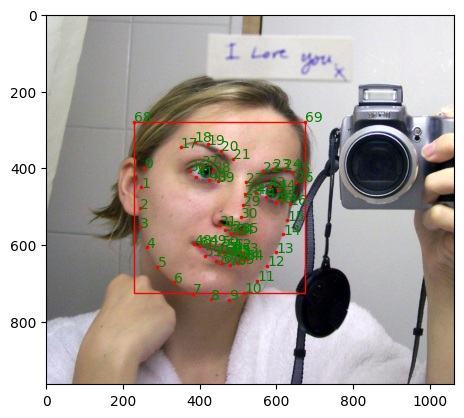

In [6]:
img = cv2.imread(os.path.join(datadir, img_name))
img = img.astype(np.float32)/255.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.scatter(landmark[:, 0], landmark[:, 1], s=10, marker='.', c='r')
rect = plt.Rectangle((bbox['left'], bbox['top']), bbox['width'], bbox['height'], fill=False, color='red')
plt.gca().add_patch(rect)
for i, (x, y) in enumerate(landmark):
    plt.text(x, y, str(i), color='green')

In [7]:
def load_filter_landmarks(annotation_file):
    with open(annotation_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        points = {}
        for i, row in enumerate(csv_reader):
            # skip head or empty line if it's there
            try:
                x, y = float(row[1]), float(row[2])
                points[row[0]] = (x, y)
            except ValueError:
                continue
        return points

In [8]:
points = load_filter_landmarks(filter_point_path[0])
filter_points = np.empty((0, 2), float)
for key in points:
    filter_points = np.append(filter_points, [[points[key][0], points[key][1]]], axis = 0)

print(filter_points.shape)

(70, 2)


(739, 542, 4)
255


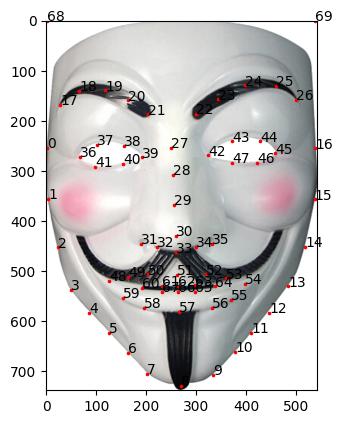

In [9]:
filter_img = cv2.imread(filter_path[0], cv2.IMREAD_UNCHANGED)
print(filter_img.shape)
filter_img, mask_filter = filter_img[:, :, :3], filter_img[:, :, 3]
# mask_filter = mask_filter > 1
print(np.max(mask_filter))
filter_img = filter_img.astype(np.float32)/255.0
filter_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2RGB)
plt.imshow(filter_img)
plt.scatter(filter_points[:, 0], filter_points[:,1], s=10, marker='.', c='r')
for i in range(filter_points.shape[0]):
    plt.text(filter_points[i,0], filter_points[i,1], str(i))

In [10]:
filter_img1 = filter_img.copy()
filter_img2 = np.zeros(filter_img.shape, dtype=np.float32)
tri1 = np.float32([[360, 200], [60, 250], [450, 400]])
tri2 = np.float32([[400, 200], [160, 270], [400, 400]])

print(tri1)

[[360. 200.]
 [ 60. 250.]
 [450. 400.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(300.0, 0.0), (0.0, 50.0), (390.0, 200.0)]
(201, 241, 3)


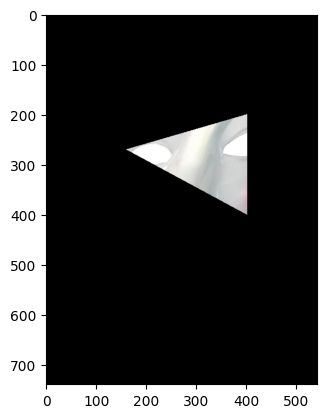

In [11]:
filter_img1 = filter_img.copy()
filter_img2 = np.zeros(filter_img.shape, dtype=np.float32)
tri1 = np.float32([[360, 200], [60, 250], [450, 400]])
tri2 = np.float32([[400, 200], [160, 270], [400, 400]])

# Find bounding box.
r1 = cv2.boundingRect(tri1) 
r2 = cv2.boundingRect(tri2)

# Offset points by left top corner of the respective rectangles
tri1Cropped = []
tri2Cropped = []

for i in range(0,3):
    tri1Cropped.append(((tri1[i][0] - r1[0]),(tri1[i][1] - r1[1])))
    tri2Cropped.append(((tri2[i][0] - r2[0]),(tri2[i][1] - r2[1])))


filter_img1Cropped = filter_img1[r1[1]: r1[1] + r1[3], r1[0]: r1[0] + r1[2]]

warpMat = cv2.getAffineTransform( np.float32(tri1Cropped), np.float32(tri2Cropped) )
filter_img2Cropped = cv2.warpAffine( filter_img1Cropped, warpMat, (r2[2], r2[3]), None, 
                                    flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT )

mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32)

cv2.fillConvexPoly(mask, np.int32(tri2Cropped), (1.0, 1.0, 1.0), 16, 0)

# print(filter_img2Cropped[mask.astype(np.bool_)])

# filter_img2Cropped = filter_img2Cropped*mask

# filter_img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = filter_img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]]*( 1.0 - mask )

filter_img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]][mask.astype(np.bool_)] = filter_img2Cropped[:,:,:][mask.astype(np.bool_)]

plt.imshow(filter_img2)
print(tri1Cropped)
print(filter_img2Cropped.shape)

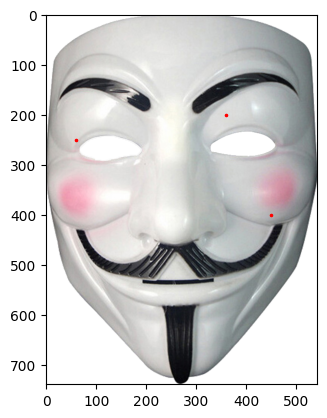

In [12]:
# cv2.imshow('filter_img1Cropped', filter_img1Cropped)
# if cv2.waitKey(1)&0xFF == 27:
#     cv2.destroyAllWindows()
# cv2.destroyAllWindows()
plt.imshow(filter_img)
plt.scatter(tri1[:, 0], tri1[:, 1], s=10, marker='.', c='r')

In [13]:
##Return vector Triangle and of vector Id
def find_delauney(img, points):
    size = img.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    subdiv.initDelaunay(rect)
    # for p in points:
    #     subdiv.insert(p)

    vertex_dict = {}
    for index in range(points.shape[0]):
        # print(points[index])
        vertex_dict[str(points[index][0]) + '.' + str(points[index][1])] = index
        subdiv.insert(points[index])

    delauney_id = []
    triangleList = subdiv.getTriangleList()
    for t in triangleList:
        pt = []
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))
        pt = np.float32(pt)
        ind = []
        for j in range(0, 3):
            for k in range(0, len(points)):
                if (pt[j][0] == points[k][0]) and (pt[j][1] == points[k][1]):
                    ind.append(k)
                    break
                    # ind.append(vertex_dict[str(pt[j][0]) + '.' + str(pt[j][1])])

        if len(ind) == 3:
            delauney_id.append((ind[0], ind[1], ind[2]))
        if len(ind) != 3:
            print("Error: ", len(ind))
    return triangleList, delauney_id

In [14]:
te1 = np.float32([[360, 200], [60, 250], [450, 400]])
te2 = np.float32([[400, 200], [160, 270], [400, 400]])
print(cv2.getAffineTransform(te1, te2))

for i in landmark:
    cnt = 0
    for j in landmark:
        if (i[0] == j[0]) and (i[1] == j[1]):
            cnt+=1
    if cnt > 1:
        print("Duplicate! ", cnt, i)


[[ 7.44186047e-01 -3.34883721e-01  1.99069767e+02]
 [-6.20155039e-02  1.02790698e+00  1.67441860e+01]]
Duplicate!  2 [452. 618.]
Duplicate!  2 [466. 623.]
Duplicate!  2 [488. 625.]
Duplicate!  2 [488. 625.]
Duplicate!  2 [466. 623.]
Duplicate!  2 [452. 618.]


116


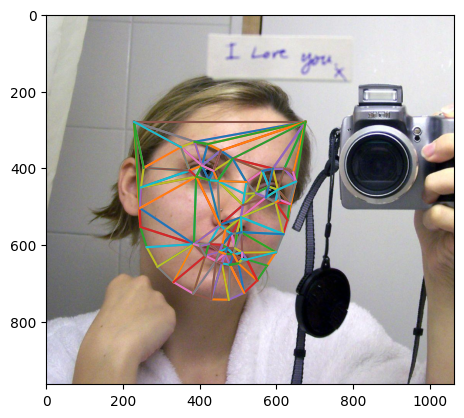

In [15]:
def draw_delaunay(img, points):

    triangleList, triangleId = find_delauney(img, points)
    print(len(triangleId))
    for t in triangleList :
         
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        ##Draw triagle from 3 points using plt
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
        plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]])
        plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]])
    
    plt.imshow(img)

draw_delaunay(img, landmark)

119


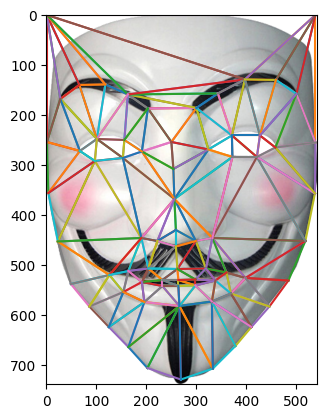

In [16]:
draw_delaunay(filter_img, filter_points)

In [17]:
a = np.array([1, 2 ,3 ,4])
p = [(1,2,3),(0,1,3)]
t = a[p]
print(t)
x = tuple(a[0:2])
y = tuple(a[2:4])
z = np.array([a[j * 2: 2 * j + 2] for j in range(2)])

print(z)
cv2.destroyAllWindows()

[[2 3 4]
 [1 2 4]]
[[1 2]
 [3 4]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


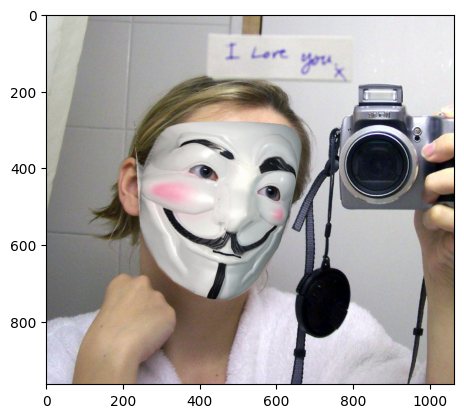

In [18]:
def apply_filter(img, img_points, filter_img, filter_points, mask_filter):
    res = img.copy()
    triangleList1, triagleId1 = find_delauney(img, img_points)
    # triangleList2, triagleId2 = find_delauney(filter_img, filter_points)
    number_of_triangles = len(triagleId1)

    for i in range(0, number_of_triangles):

        tria1 = np.array(img_points[np.array(triagleId1[i])], dtype=np.float32)
        tria2 = np.array(filter_points[np.array(triagleId1[i])], dtype=np.float32)

        r1 = cv2.boundingRect(tria1) #x, y, w, h
        r2 = cv2.boundingRect(tria2) #x, y, w, h

        trig1Cropped = []
        trig2Cropped = []

        for i in range(3):
            trig1Cropped.append(((tria1[i][0] - r1[0]),(tria1[i][1] - r1[1]))) #x - x0, y - y0
            trig2Cropped.append(((tria2[i][0] - r2[0]),(tria2[i][1] - r2[1]))) #x - x0, y - y0
        
        img2Cropped = filter_img[r2[1]: r2[1] + r2[3], r2[0]: r2[0] + r2[2]] #y -> y + h, x -> x + w
        mask_filterCropped = mask_filter[r2[1]:r2[1] + r2[3] , r2[0]:r2[0 ] + r2[2]]

        # print(mask_filterCropped)

        warpMat = cv2.getAffineTransform( np.float32(trig2Cropped), np.float32(trig1Cropped) )

        img1Cropped = cv2.warpAffine( img2Cropped, warpMat, (r1[2], r1[3]), None, 
                                     flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT )
        img1Cropped = np.nan_to_num(img1Cropped, nan = 0)
        # print(img1Cropped)

        mask_filterCropped = cv2.warpAffine( mask_filterCropped, warpMat, (r1[2], r1[3]), None, 
                                     flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT )
        
        mask_filterCropped = cv2.merge((mask_filterCropped, mask_filterCropped, mask_filterCropped))

        mask = np.zeros((r1[3], r1[2], 3), dtype = np.float32)
        mask = cv2.fillConvexPoly(mask, np.int32(trig1Cropped), (1.0, 1.0, 1.0), 16, 0)

        # print(mask_filterCropped)
        MAX = np.max(mask_filterCropped)
        mask_filterCropped = np.array(mask_filterCropped * (1./MAX), dtype = np.float32)
        # print(mask_filterCropped)
        
        mask = np.multiply(mask, mask_filterCropped)
        # print(mask.shape)
        # mask = mask > 10000
        # print(mask.shape)
        # mask = mask.astype(np.bool_)

        # img1Cropped = img1Cropped * mask
        # mask = cv2.GaussianBlur(mask, (3, 3), 10)

        res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]] = res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]] * ((1.0, 1.0, 1.0) - mask)
        res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]] = res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]] + img1Cropped[:,:,:] * mask

        # res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]][mask.astype(np.bool_)] = img1Cropped[mask.astype(np.bool_)]
        
        # res[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]][mask] = img1Cropped[mask]


    # res = cv2.GaussianBlur(res, (3, 3), 10)
    return res

my_img = apply_filter(img, landmark, filter_img, filter_points, mask_filter)
plt.imshow(my_img)
my_img = cv2.cvtColor(my_img, cv2.COLOR_RGB2BGR)
# cv2.imshow("my_img", my_img)
# cv2.destroyAllWindows() 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [19]:
test1 = np.array([[394.0, 334.], [464., 457.], [388., 452.]], dtype=np.float32)
print(test1)
re = cv2.boundingRect(test1)

[[394. 334.]
 [464. 457.]
 [388. 452.]]


In [20]:
import cv2
import os
from facenet_pytorch import MTCNN
import torch
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A
from albumentations import Compose
from albumentations.pytorch.transforms import ToTensorV2
import pyrootutils

__file__ = '/Users/tiendzung/Project/facial_landmarks-wandb/notebooks/explore_app.ipynb'
path = pyrootutils.find_root(
    search_from=__file__, indicator=".project-root")
config_path = str(path / "configs" / "model")
output_path = path / "outputs"
pyrootutils.setup_root(__file__, indicator=".project-root", pythonpath=True)



device =  torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
mtcnn = MTCNN(thresholds= [0.7, 0.7, 0.8] ,keep_all=True, device = device)

transform = Compose([
                A.Resize(224, 224),
                A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ToTensorV2(),
            ])

filters_config = {
    'squid_game_front_man':
        [{'path': "filters/squid_game_front_man.png",
          'anno_path': "filters/squid_game_front_man.csv",
          'morph': True, 'animated': False, 'has_alpha': True}],
    'anonymous':
        [{'path': "filters/anonymous.png",
          'anno_path': "filters/anonymous_annotations.csv",
          'morph': True, 'animated': False, 'has_alpha': True}],
    'dog':
        [{'path': "filters/dog-ears.png",
          'anno_path': "filters/dog-ears_annotations.csv",
          'morph': False, 'animated': False, 'has_alpha': True},
         {'path': "filters/dog-nose.png",
          'anno_path': "filters/dog-nose_annotations.csv",
          'morph': False, 'animated': False, 'has_alpha': True}],
    'cat':
        [{'path': "filters/cat-ears.png",
          'anno_path': "filters/cat-ears_annotations.csv",
          'morph': False, 'animated': False, 'has_alpha': True},
         {'path': "filters/cat-nose.png",
          'anno_path': "filters/cat-nose_annotations.csv",
          'morph': False, 'animated': False, 'has_alpha': True}],
    'jason-joker':
        [{'path': "filters/jason-joker.png",
          'anno_path': "filters/jason-joker_annotations.csv",
          'morph': True, 'animated': False, 'has_alpha': True}],
    'flower-crown':
        [{'path': "filters/flower-crown.png",
          'anno_path': "filters/flower-crown_annotations.csv",
          'morph': False, 'animated': False, 'has_alpha': True}],
}

/Users/tiendzung/anaconda3/envs/facial/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu


In [21]:
from src.models.components.simple_resnet import SimpleResnet
from src.models.dlib_module import DlibLitModule
from src.app import filter_processor as fp

net = SimpleResnet()
# print(net)
model = DlibLitModule.load_from_checkpoint(
    checkpoint_path='/Users/tiendzung/Project/facial_landmarks-wandb/checkpoints/epoch_095.ckpt', 
    net = net
    )
print(model)

DlibLitModule(
  (net): SimpleResnet(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): Batc

In [22]:
import sys
sys.path.append('/Users/tiendzung/Project/facial_landmarks-wandb')
os.chdir('/Users/tiendzung/Project/facial_landmarks-wandb')

# create the output video file
def init_video_writer(cap):
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    return cv2.VideoWriter(os.path.join(output_path,'output_nb.mp4'), fourcc, fps, frame_size)

filter = filters_config['anonymous']
# frame = cv2.imread('/Users/tiendzung/Desktop/Screen Shot 2023-06-24 at 11.10.31.png')
# frame = cv2.imread('data/ibug_300W_large_face_landmark_dataset/helen/testset/3266693323_1.jpg')
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('/Users/tiendzung/Downloads/record-webcam.mov')
# cap.set(cv2.CAP_PROP_FRAME_WIDTH,640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT,480)

video_writer = init_video_writer(cap)

while cap.isOpened():
    isSuccess, frame = cap.read()
    # frame = np.pad(frame, ((200, 200), (200, 200), (0, 0)), mode='constant', constant_values=0)
    if isSuccess:
        frame = np.pad(frame, ((200, 200), (200, 200), (0, 0)), mode='constant', constant_values=0)
        boxes, _ = mtcnn.detect(frame)
        faces = mtcnn(frame)
        if boxes is not None:
            face_box = []
            for box in boxes:
                bbox = list(map(int,box.tolist())) ##x1, y1, x2, y2
                face_box.append(bbox)
                # frame = cv2.rectangle(frame,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,0,255),3) ##Draw Bounding box with the coordinates

            for j, face in enumerate(faces):
                face = face.permute(1, 2, 0).numpy()*255
                h = face_box[j][3] - face_box[j][1]
                w = face_box[j][2] - face_box[j][0]
                landmarks = model.forward(transform(image = face)["image"].unsqueeze(0))[0]
                landmarks = (landmarks + 0.5) * torch.Tensor([w, h])
                landmarks = landmarks + torch.Tensor([face_box[j][0], face_box[j][1]])
                landmarks = landmarks.detach().numpy()

                ## Add 2 points to landmarks
                landmarks = np.append(landmarks, [[face_box[j][0], face_box[j][1]]], axis = 0)
                landmarks = np.append(landmarks, [[face_box[j][0] + w, face_box[j][1]]], axis = 0)

                # for i in range (landmarks.shape[0]):
                #     frame = cv2.circle(frame, (int(landmarks[i, 0]),int(landmarks[i, 1])), radius=1, color=(255, 255, 0), thickness= 1) ##Draw landmarks
                
                filter_img = cv2.imread(filter[0]['path'], cv2.IMREAD_UNCHANGED)
                filter_points = fp.load_filter_points(filter[0]['anno_path'])
            
                ## Get alpha channel
                alpha = []
                if filter[0]['has_alpha']:
                    b, g, r, alpha = cv2.split(filter_img)
                    filter_img = cv2.merge((b, g, r))

                frame = fp.apply_filter(frame, landmarks, filter_img, filter_points, alpha)
        frame = frame[200:-200, 200:-200, :]
            
    video_writer.write(frame)
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow('Face Filter', frame)
    if cv2.waitKey(1)&0xFF == 27:
        print("YES")
        break
    # plt.imshow(frame)
cv2.destroyAllWindows()
# frame = cv2.cvtColor(frame[200:-200, 200:-200, :], cv2.COLOR_BGR2RGB)
# plt.imshow(frame)

YES


In [72]:
a = {'0': (1, 2), '1': (2,3) }
d = [1, 2]
c = np.array([a[str(i)] for i in range(2)])
# print(np.array(a[str(0)]))

b = np.array(list(a.values()))
print(b)

iter_a = iter(a.keys())
print(next(iter_a))
print(next(iter_a))

[[1 2]
 [2 3]]
0
1


In [56]:
a = np.array([1, 2, 3])
b = a
b[0] = 5
print(a[0])

for i in range(10):
    out = i*2

for i in range(10):
    out = out + 1

print(out)


5
28


In [65]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5,6]]])
print(a.shape)
a*2
print(a)

(2, 2, 3)
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


In [71]:
a = []
try:
    a = 1
except:
    a = 2

print(a)

1
